In [1]:
## importando bibliotecas necessárias para o funcionamento da atividade
# Sklearn: Biblioteca de Machine Learn e que tem a base de dados dos digitos
# Matplotlib: Biblioteca para plotagem de gráficos


from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
digits.images.shape



(1797, 8, 8)

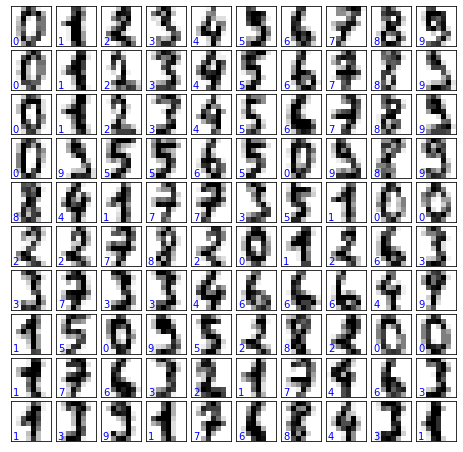

In [2]:
# Visualizando Os dados 
fig,axes = plt.subplots(10,10, figsize=(8,8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest'),
    ax.text(0.05,0.05,str(digits.target[i]),
           transform=ax.transAxes, color = 'blue')

In [3]:
# tamanho da matrix, sendo duas dimensões. [n_samples,n_features]
X = digits.data
X.shape

(1797, 64)

In [4]:
# matrix foco, de uma dimensão.
y = digits.target
y.shape

(1797,)

In [5]:
# utilizarndo o Mainfold e Isomap para reduzir a complexidade da matrix de 64 para 2
from sklearn.manifold import Isomap

iso = Isomap(n_components =2)
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

In [6]:
# treinando o modelo de test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [7]:
# Transformando a matrix em um Modelo Naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB
GNB= GaussianNB()
GNB.fit(X_train,y_train)
y_GNB = GNB.predict(X_test)

In [8]:
# Test de Acurácia 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_GNB)

0.8333333333333334

Text(91.68, 0.5, 'True Value')

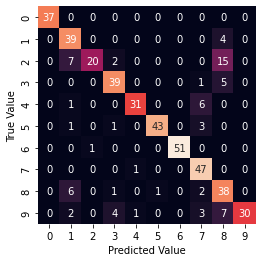

In [9]:
# Criando uma sklearn confusion matrix, utilizando heatmap
import seaborn as sns
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_GNB)
sns.heatmap(matrix, square = True, annot = True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

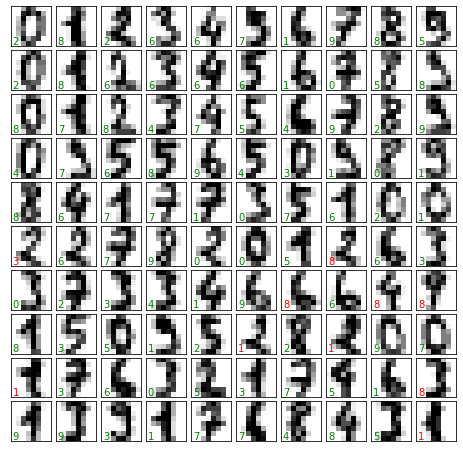

In [10]:
#Visualização do Modelo com a data e suas previsões. (verde Correto, Vermelho para errada)
fig,axes = plt.subplots(10,10, figsize=(8,8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest'),
    ax.text(0.05,0.05,str(y_GNB[i]),
           transform=ax.transAxes, 
            color = 'green' if (y_test[i]==y_GNB[i]) 
                               else 'red')